In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Load dataset from kaggle

In [6]:
df = pd.read_csv("bank-full.csv", sep = ";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Basic Data Exploration (EDA)

In [10]:
df.shape

(45211, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
# Target Variable Distribution
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

# Feature-wise Exploration

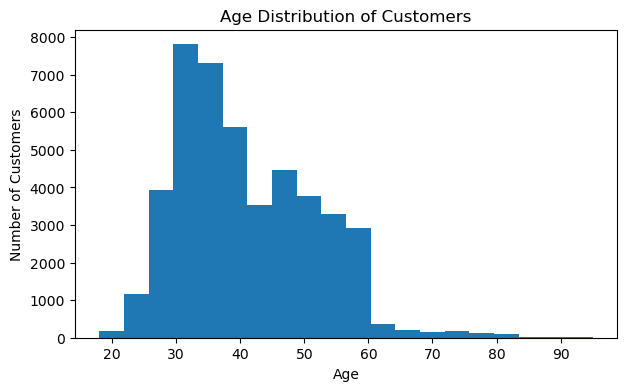

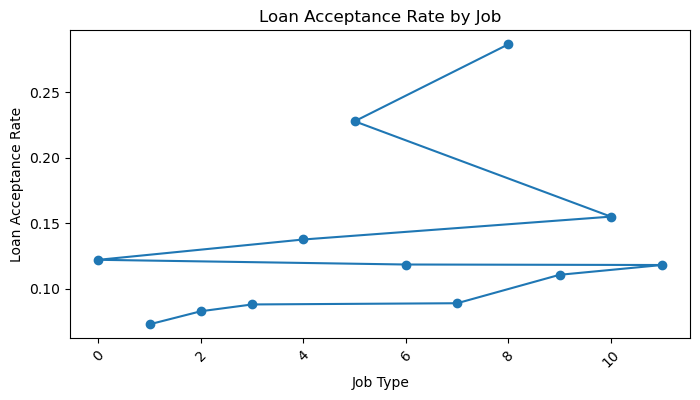

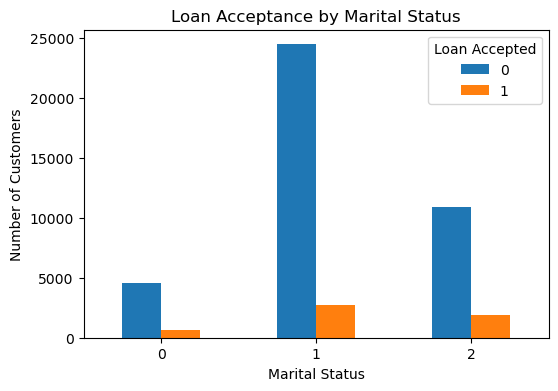

In [27]:
# Age Distribution
plt.figure(figsize=(7,4))
plt.hist(df['age'], bins=20)
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Age Distribution of Customers")
plt.show()

# Job vs Loan Acceptance
job_rate = df.groupby('job')['y'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
plt.plot(job_rate.index, job_rate.values, marker='o')
plt.xlabel("Job Type")
plt.ylabel("Loan Acceptance Rate")
plt.title("Loan Acceptance Rate by Job")
plt.xticks(rotation=45)
plt.show()

# Marital Status vs Loan Acceptance
marital_loan = pd.crosstab(df['marital'], df['y'])

marital_loan.plot(kind='bar', figsize=(6,4))
plt.xlabel("Marital Status")
plt.ylabel("Number of Customers")
plt.title("Loan Acceptance by Marital Status")
plt.xticks(rotation=0)
plt.legend(title="Loan Accepted")
plt.show()

# Data Preprocessing

In [15]:

# Encode Categorical Variables
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Feature & Target Split
X = df.drop('y', axis=1)
y = df['y']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling 
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Decision Tree Classifier 

Decision Tree Accuracy: 0.8935087913303107
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.59      0.40      0.48      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.68      0.71      9043
weighted avg       0.88      0.89      0.88      9043



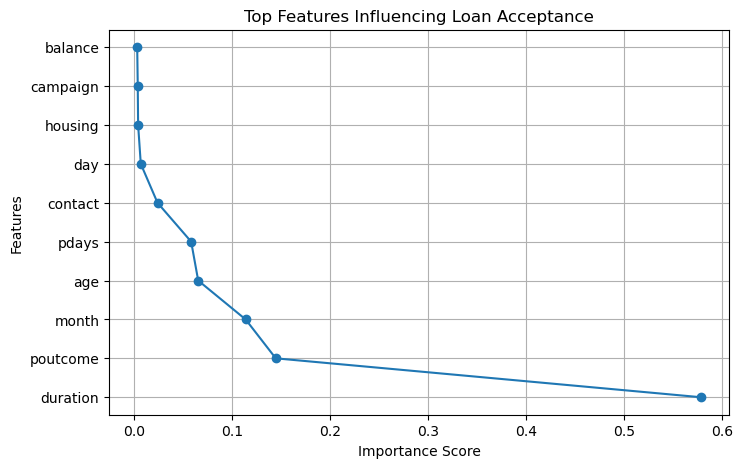

Model successfully predicts customers likely to accept personal loan.
Useful for targeted marketing and reducing campaign cost.


In [23]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Feature Importance 
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_features = feature_importance.head(10)

plt.figure(figsize=(8,5))
plt.plot(top_features['Importance'], top_features['Feature'], marker='o')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top Features Influencing Loan Acceptance")
plt.grid(True)
plt.show()

# Business Insights from Model
feature_importance.head(5)

# Conclusion 
print("Model successfully predicts customers likely to accept personal loan.")
print("Useful for targeted marketing and reducing campaign cost.")